# INTRODUÇÃO


O presente projeto consiste na elaboração de uma análise de cohort inicial, com o objetivo de aprimorar minha compreensão sobre os métodos analíticos, contribuindo assim para meu desenvolvimento como cientista de dados. Os dados utilizados foram extraídos de um conjunto disponível no Kaggle, proporcionando um contexto prático e enriquecedor para a exploração analítica. O link para a base de dados está acessível em: https://www.kaggle.com/datasets/jihyeseo/online-retail-data-set-from-uci-ml-repo. Este projeto representa não apenas um exercício analítico, mas também uma valiosa oportunidade de ampliar meu repertório no vasto campo da ciência de dados.

# ANÁLISE

In [4]:
# Carregando biblioteca
import pandas as pd

# Carregando dataset
retail = pd.read_excel("data/Online Retail.xlsx")

# Exibe as primeiras linhas
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
retail.dropna(subset=["CustomerID"], inplace=True)

In [6]:
retail.shape

(406829, 8)

In [7]:
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [11]:
invoice_per_costumer = retail.groupby(["CustomerID"])["InvoiceNo"].nunique()
invoice_per_costumer.describe()

count    4372.000000
mean        5.075480
std         9.338754
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       248.000000
Name: InvoiceNo, dtype: float64

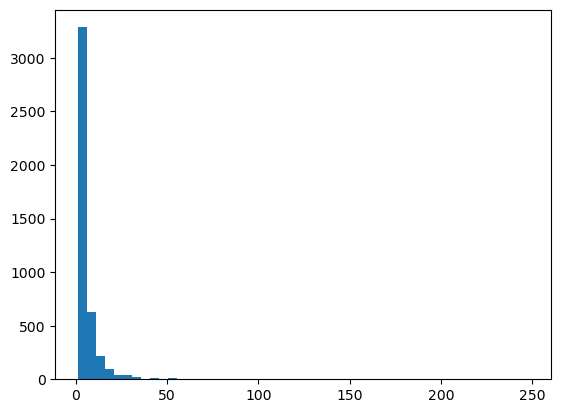

In [15]:
import matplotlib.pyplot as plt

_ = plt.hist(invoice_per_costumer, bins=50)

In [16]:
# Primeiro limpeza: remover duplicidades
retail = retail[["CustomerID", "InvoiceDate", "InvoiceNo"]].drop_duplicates()

In [17]:
# Organizar por meses
retail["InvoiceMonth"] = retail["InvoiceDate"].dt.to_period("M")

In [18]:
# Vamos pegar o primeiro mês de compra, ou seja, a entrada do cliente
retail["cohort"] = retail.groupby("CustomerID")["InvoiceDate"].transform("min").dt.to_period("M")

In [19]:
retail.head()

,CustomerID,InvoiceDate,InvoiceNo,InvoiceMonth,cohort
0,17850.0,2010-12-01 08:26:00,536365,2010-12,2010-12
7,17850.0,2010-12-01 08:28:00,536366,2010-12,2010-12
9,13047.0,2010-12-01 08:34:00,536367,2010-12,2010-12
21,13047.0,2010-12-01 08:34:00,536368,2010-12,2010-12
25,13047.0,2010-12-01 08:35:00,536369,2010-12,2010-12


In [22]:
retail_cohort = retail.groupby(["cohort", "InvoiceMonth"]).agg(n_costumer=("CustomerID","nunique")).reset_index(drop=False)
retail_cohort.head()

,cohort,InvoiceMonth,n_costumer
0,2010-12,2010-12,948
1,2010-12,2011-01,362
2,2010-12,2011-02,317
3,2010-12,2011-03,367
4,2010-12,2011-04,341


In [23]:
retail_cohort["period"] = (retail_cohort.InvoiceMonth - retail_cohort.cohort).apply(lambda x: x.n)
retail_cohort.head()

,cohort,InvoiceMonth,n_costumer,period
0,2010-12,2010-12,948,0
1,2010-12,2011-01,362,1
2,2010-12,2011-02,317,2
3,2010-12,2011-03,367,3
4,2010-12,2011-04,341,4


In [26]:
cohort_pivot = retail_cohort.pivot_table(index="cohort", columns="period", values="n_costumer")
cohort_pivot

period,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
cohort_size = cohort_pivot.iloc[:,0]
cohort_size

cohort
2010-12    948.0
2011-01    421.0
2011-02    380.0
2011-03    440.0
2011-04    299.0
2011-05    279.0
2011-06    235.0
2011-07    191.0
2011-08    167.0
2011-09    298.0
2011-10    352.0
2011-11    321.0
2011-12     41.0
Freq: M, Name: 0, dtype: float64

In [36]:
retention_matix = cohort_pivot.divide(cohort_size, axis = 0)
retention_matix

period,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


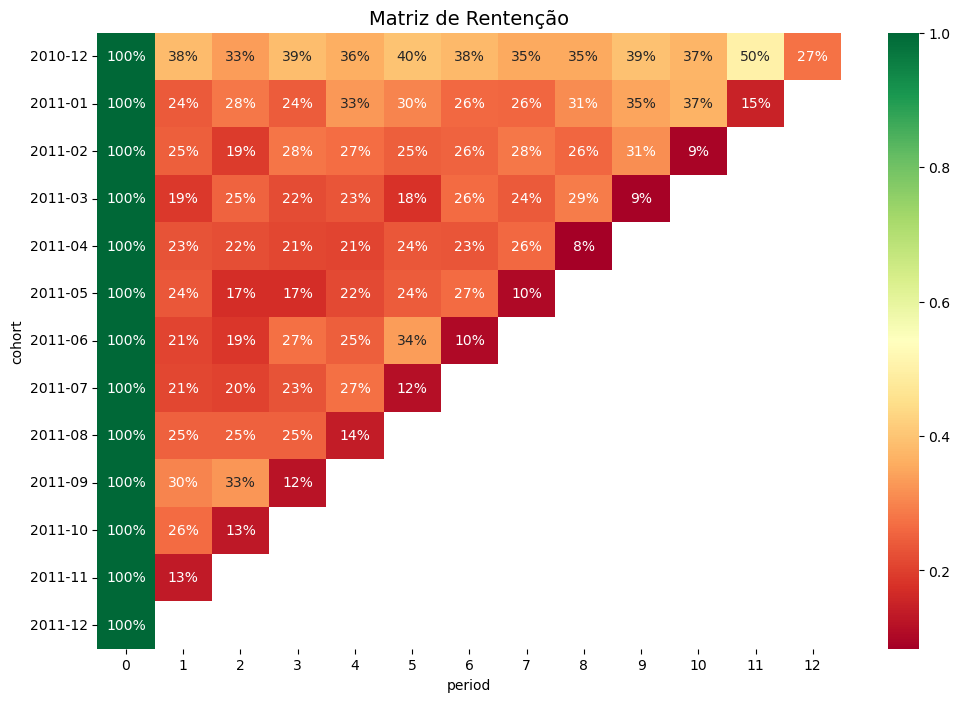

In [46]:
import seaborn as sns

_ = plt.subplots(figsize=(12,8)) 

_ = sns.heatmap(
    data=retention_matix,
    mask=retention_matix.isnull(),
    annot=True,
    fmt = ".0%",
    cmap = "RdYlGn"
)

_ = plt.title("Matriz de Rentenção", size=14)